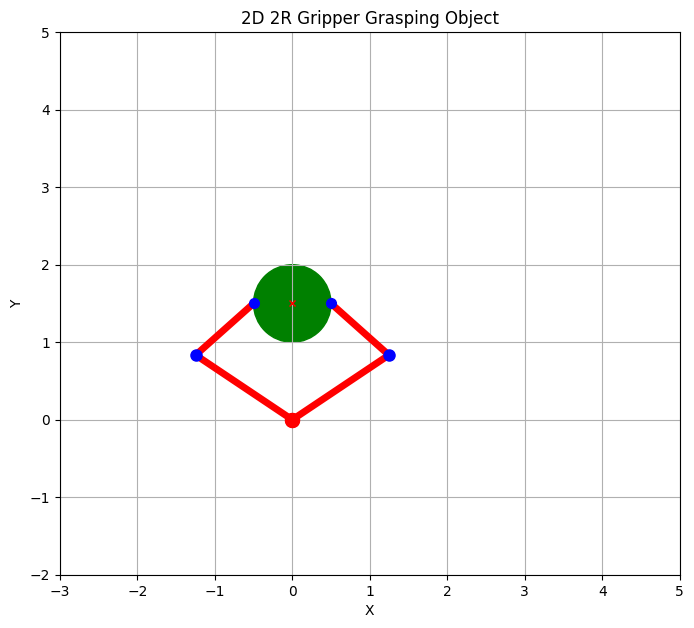

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# lengths of finger 1
L1a = 1.5
L1b = 1

# lengths of finger 2
L2a = 1.5
L2b = 1


# Define joint angles of finger 1
theta1a = 2.5516050439
theta1b = -1.8234765819369754

# Define joint angles of finger 2
theta2a = 0.5899877365718454
theta2b =1.8234765819369754

# Forward Kinematics to calculate finger1 positions
x1a = L1a * np.cos(theta1a)
y1a = L1a * np.sin(theta1a)

x1b = x1a + L1b * np.cos(theta1a + theta1b)
y1b = y1a + L1b * np.sin(theta1a + theta1b)

# Forward Kinematics to calculate finger2 positions
x2a = L1a * np.cos(theta2a)
y2a = L1a * np.sin(theta2a)

x2b = x2a + L1b * np.cos(theta2a + theta2b)
y2b = y2a + L1b * np.sin(theta2a + theta2b)

# Plotting
plt.figure(figsize=(8, 8))

# Plot finger1 links
plt.plot([0, x1a], [0, y1a], 'r-', lw=5)  #first link of finger1          [0, x1] and [0, y1] represent the x and y coordinates of the line's endpoints respectively.
                                                                          #red ('r') and solid ('-'). lw=2 sets the line width to 2 for better visibility
plt.plot([x1a, x1b], [y1a, y1b], 'r-', lw=5)  #second link of finger1

# Plot finger2 links
plt.plot([0, x2a], [0, y2a], 'r-', lw=5)  #first link of finger2
plt.plot([x2a, x2b], [y2a, y2b], 'r-', lw=5)  #second link of finger2

# Plot first fingers
plt.plot(0, 0, 'ro', markersize=10)  # Base of gripper || red ('r') circle ('o') at the origin (0, 0)
plt.plot(x1a, y1a, 'bo', markersize=8)  # Joint 1 || blue ('b') circle ('o') at the origin (0, 0)
plt.plot(x1b, y1b, 'bo', markersize=7)  # Joint 2

# Plot second fingers
plt.plot(0, 0, 'ro', markersize=10)  # Base of gripper
plt.plot(x2a, y2a, 'bo', markersize=8)  # Joint 1
plt.plot(x2b, y2b, 'bo', markersize=7)  # Joint 2

# Define object parameters
object_position = np.array([0, 1.5])  # Object position
object_radius = 0.5  # Object radius

# Plot object
circle = plt.Circle((object_position[0], object_position[1]), object_radius, color='g', alpha=1)
plt.gca().add_patch(circle)

# Plot object position
plt.plot(object_position[0], object_position[1], 'rx', markersize=5)

# Set plot limits and aspect
plt.xlim(-3, 5)
plt.ylim(-2, 5)
plt.gca().set_aspect('equal', adjustable='box')

# Labels and legend
plt.title('2D 2R Gripper Grasping Object')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(['Link 1a', 'Link 1b','Link 2a', 'Link 2b','Object', 'Object Position'])

plt.grid(True)
plt.show()


In [92]:
import numpy as np

def inverse_kinematics_2R(x, y, L1, L2):
    # Calculate theta2
    r_squared = x**2 + y**2
    cos_theta2 = (r_squared - L1**2 - L2**2) / (2 * L1 * L2)
    sin_theta2 = np.sqrt(1 - cos_theta2**2)
    theta2 = np.arctan2(sin_theta2, cos_theta2)

    # Calculate theta1
    theta1 = np.arctan2(y, x) - np.arctan2(L2 * np.sin(theta2), L1 + L2 * np.cos(theta2))

    return theta1, theta2

In [93]:
# Example usage
x = 0.5  # desired x-coordinate of end-effector
y = 1.5  # desired y-coordinate of end-effector
L1 = 1.5  # length of the first link
L2 = 1  # length of the second link

theta1, theta2 = inverse_kinematics_2R(x, y, L1, L2)
print(theta1, theta2, np.degrees(theta1), np.degrees(theta2))

0.5899877365718454 1.8234765819369754 33.80380727004295 104.47751218592994


In [94]:
def grasp_matrix(t1, n1, x1):

    t1 = np.atleast_2d(t1).T
    n1 = np.atleast_2d(n1).T
    x1 = np.atleast_2d(x1).T

    G = np.block([[t1, n1], [np.cross(x1.T, t1.T).T, np.cross(x1.T, n1.T).T]])
    return G



In [95]:
# Test
t1 = np.array([0, -1])
n1 = np.array([1, 0])
x1 = np.array([-0.5, 0])

G1 = grasp_matrix(t1, n1, x1)
print(G1)

[[ 0.   1. ]
 [-1.   0. ]
 [ 0.5 -0. ]]


In [96]:
# Test
t1 = np.array([0, 1])
n1 = np.array([-1, 0])
x1 = np.array([-0.5, 0])

G2 = grasp_matrix(t1, n1, x1)
print(G2)

[[ 0.  -1. ]
 [ 1.   0. ]
 [-0.5  0. ]]


In [124]:

G = np.column_stack([G1,G2])

In [98]:
print(G)

[[ 0.   1.   0.  -1. ]
 [-1.   0.   1.   0. ]
 [ 0.5 -0.  -0.5  0. ]]


In [125]:
G = G[0:2,0:]

In [126]:
import numpy as np
def W(t, n):
    t = np.atleast_2d(t).T
    n = np.atleast_2d(n).T
    w  = np.block([t,n])
    return w


def rotation_matrix_2d(theta):
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    return R

def jacobian(l1,l2,theta1,theta2):
    J = np.array([[-l1*np.sin(theta1), -l2*np.sin(theta2)],
                  [l1*np.cos(theta1), l2*np.cos(theta2)]])
    return J



# test first finger
t = np.array([0, -1])
n = np.array([1, 0])
theta = 0
theta1 = 2.5516050439
theta2 = -1.8234765819369754
l1 = 1.5
l2 = 1
w= W(t, n)
R= rotation_matrix_2d(theta)
J = jacobian(l1,l2,theta1,theta2)
print(w)

print(R)

print(J)

[[ 0  1]
 [-1  0]]
[[ 1. -0.]
 [ 0.  1.]]
[[-0.83452609  0.96824584]
 [-1.24642136 -0.25      ]]


In [127]:
def hand_jacobian(t,n,w,R,J):

    WRJ = np.dot(np.dot(w,R), J)
    O  = np.zeros((2,2))
    HJR1 = np.concatenate([WRJ,O],axis=1)
    return HJR1

HJR1 = hand_jacobian(t,n,w,R,J)
print(HJR1)


[[-1.24642136 -0.25        0.          0.        ]
 [ 0.83452609 -0.96824584  0.          0.        ]]


In [128]:
#second finger
t = np.array([0, 1])
n = np.array([-1, 0])
theta = 0
theta1 = 0.5899877365718454
theta2 = 1.8234765819369754
l1 = 1.5
l2 = 1
w= W(t, n)
R= rotation_matrix_2d(theta)
J = jacobian(l1,l2,theta1,theta2)
print(w)

print(R)

print(J)

[[ 0 -1]
 [ 1  0]]
[[ 1. -0.]
 [ 0.  1.]]
[[-0.83452625 -0.96824584]
 [ 1.24642125 -0.25      ]]


In [129]:
def hand_jacobian(t1,n1,w,R,J):

    WRJ = np.dot(np.dot(w,R), J)
    O  = np.zeros((2,2))
    HJR2 = np.concatenate([O,WRJ], axis = 1)
    return HJR2

HJR2 = hand_jacobian(t,n,w,R,J)
print(HJR2)

[[ 0.          0.         -1.24642125  0.25      ]
 [ 0.          0.         -0.83452625 -0.96824584]]


In [130]:
Hand_jacobian = np.concatenate([HJR1,HJR2])
print(Hand_jacobian)

[[-1.24642136 -0.25        0.          0.        ]
 [ 0.83452609 -0.96824584  0.          0.        ]
 [ 0.          0.         -1.24642125  0.25      ]
 [ 0.          0.         -0.83452625 -0.96824584]]


In [131]:
def manipulability_index(G, Hand_jacobian):
   GT = np.transpose(G)
   print(G)
   GI = np.linalg.inv(G@GT)
   GP = np.dot(GT,GI)
   GPT = np.transpose(GP)
   A = np.dot(GPT,Hand_jacobian)
   AT = np.transpose(A)
   mu = np.sqrt(np.linalg.det(A@AT))
   return mu

In [132]:
mu = manipulability_index(G,  Hand_jacobian)
print(mu)

[[ 0.  1.  0. -1.]
 [-1.  0.  1.  0.]]
0.8124877206647897
